In [ ]:
pip install h2o

     |████████████████████████████████| 164.6MB 80kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.5-py2.py3-none-any.whl size=164673888 sha256=85e0d22c65a616eb9bc75a25fdd041ad44cf312a5e31e627c2843a7b63038fe7
  Stored in directory: /root/.cache/pip/wheels/f7/54/f6/f88d58b676e135bbab981238fcf77f27161ec02b7cc893d8c7
Successfully built h2o


In [ ]:
import h2o
import time
import math
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpftafyu92
  JVM stdout: /tmp/tmpftafyu92/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpftafyu92/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.5
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_1epn7n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
df = h2o.import_file("diabetes.csv", destination_frame="df")
df.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:768
Cols:9




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
type,int,int,int,int,int,real,real,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
mean,3.845052083333336,120.89453125,69.10546874999994,20.536458333333357,79.79947916666666,31.99257812500003,0.4718763020833334,33.240885416666615,0.3489583333333333
maxs,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0
sigma,3.36957806269887,31.972618195136224,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.47695137724279896
zeros,111,5,35,227,374,11,0,0,500
missing,0,0,0,0,0,0,0,0,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


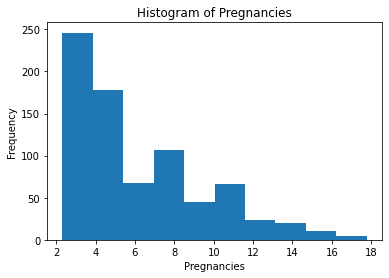

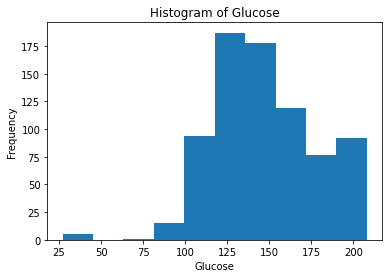

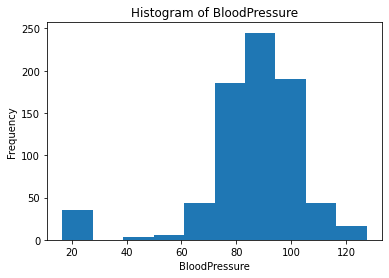

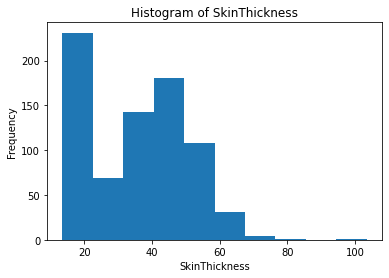

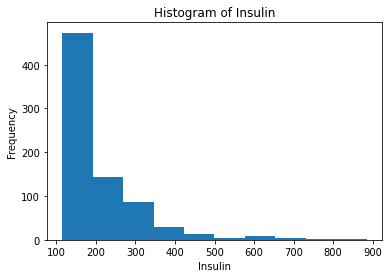

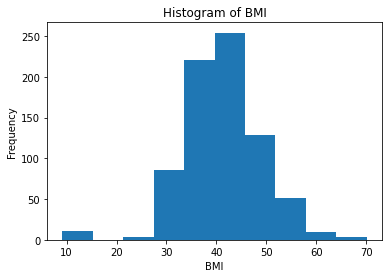

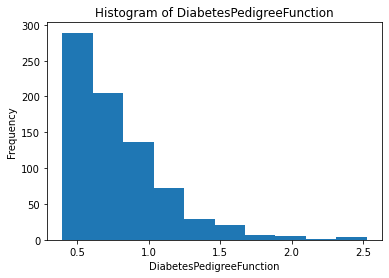

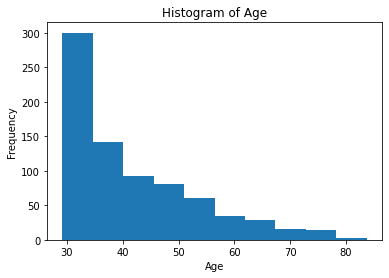

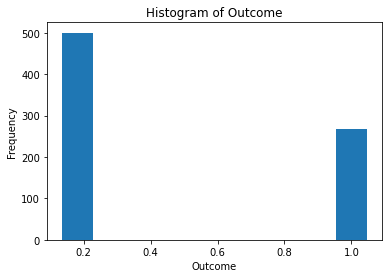

In [ ]:
for col in df.columns:
    df[col].hist()

In [ ]:
train, valid, test = df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "Outcome"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  465 148 155


In [ ]:
predictors = df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1616358385791_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,11547.0,5.0,5.0,5.0,6.0,23.0,13.68




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05394537414652564
RMSE: 0.2322614349101582
LogLoss: 0.21164045617145613
Mean Per-Class Error: 0.05419671999032927
AUC: 0.9899262602248459
AUCPR: 0.9845164166436653
Gini: 0.9798525204496917

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46220528851885034: 


,,0,1,Error,Rate
0,0,290.0,9.0,0.0301,(9.0/299.0)
1,1,14.0,152.0,0.0843,(14.0/166.0)
2,Total,304.0,161.0,0.0495,(23.0/465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.462205,0.929664,150.0
1,max f2,0.323826,0.944836,176.0
2,max f0point5,0.548022,0.967302,132.0
3,max accuracy,0.506976,0.950538,142.0
4,max precision,0.983850,1.000000,0.0
5,max recall,0.173383,1.000000,227.0
6,max specificity,0.983850,1.000000,0.0
7,max absolute_mcc,0.506976,0.892066,142.0
8,max min_per_class_accuracy,0.372134,0.939799,163.0
9,max mean_per_class_accuracy,0.370458,0.945803,164.0



Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.71 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010753,0.964760,2.801205,2.801205,1.000000,0.970134,1.000000,0.970134,0.030120,0.030120,180.120482,180.120482,0.030120
1,2,0.021505,0.959842,2.801205,2.801205,1.000000,0.963441,1.000000,0.966788,0.030120,0.060241,180.120482,180.120482,0.060241
2,3,0.030108,0.948198,2.801205,2.801205,1.000000,0.952824,1.000000,0.962798,0.024096,0.084337,180.120482,180.120482,0.084337
3,4,0.040860,0.944016,2.801205,2.801205,1.000000,0.946246,1.000000,0.958442,0.030120,0.114458,180.120482,180.120482,0.114458
4,5,0.051613,0.940243,2.801205,2.801205,1.000000,0.942268,1.000000,0.955073,0.030120,0.144578,180.120482,180.120482,0.144578
5,6,0.101075,0.910936,2.801205,2.801205,1.000000,0.924669,1.000000,0.940194,0.138554,0.283133,180.120482,180.120482,0.283133
6,7,0.150538,0.868553,2.801205,2.801205,1.000000,0.889815,1.000000,0.923641,0.138554,0.421687,180.120482,180.120482,0.421687
7,8,0.200000,0.797054,2.801205,2.801205,1.000000,0.834641,1.000000,0.901630,0.138554,0.560241,180.120482,180.120482,0.560241
8,9,0.301075,0.556327,2.801205,2.801205,1.000000,0.680179,1.000000,0.827286,0.283133,0.843373,180.120482,180.120482,0.843373
9,10,0.400000,0.326087,1.157019,2.394578,0.413043,0.441848,0.854839,0.731963,0.114458,0.957831,15.701938,139.457831,0.867530




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-03-21 20:34:51,0.121 sec,0.0,0.479112,0.651666,0.500000,0.356989,1.000000,0.643011
1,,2021-03-21 20:34:51,0.409 sec,1.0,0.456602,0.606210,0.899111,0.841991,2.801205,0.178495
2,,2021-03-21 20:34:51,0.461 sec,2.0,0.437174,0.568855,0.918050,0.868180,2.801205,0.154839
3,,2021-03-21 20:34:52,0.502 sec,3.0,0.420575,0.537898,0.919994,0.870297,2.801205,0.156989
4,,2021-03-21 20:34:52,0.530 sec,4.0,0.405987,0.511169,0.925938,0.881996,2.801205,0.148387
5,,2021-03-21 20:34:52,0.570 sec,5.0,0.392586,0.486722,0.934239,0.894388,2.801205,0.141935
6,,2021-03-21 20:34:52,0.603 sec,6.0,0.380476,0.464792,0.937936,0.899843,2.801205,0.141935
7,,2021-03-21 20:34:52,0.640 sec,7.0,0.370456,0.446541,0.939205,0.901852,2.801205,0.139785
8,,2021-03-21 20:34:52,0.669 sec,8.0,0.362031,0.431383,0.942207,0.906607,2.801205,0.133333
9,,2021-03-21 20:34:52,0.701 sec,9.0,0.355361,0.418882,0.941834,0.907237,2.801205,0.133333



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Glucose,160.889725,1.000000,0.386115
1,BMI,107.157028,0.666028,0.257163
2,DiabetesPedigreeFunction,49.382526,0.306934,0.118512
3,Age,28.789474,0.178939,0.069091
4,BloodPressure,24.516136,0.152379,0.058836
5,Pregnancies,22.055462,0.137084,0.052930
6,Insulin,12.949581,0.080487,0.031077
7,SkinThickness,10.949017,0.068053,0.026276


In [ ]:
perf = gbm.model_performance(valid)
print(perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.18115330538099383
RMSE: 0.4256210819273334
LogLoss: 0.5366686568411096
Mean Per-Class Error: 0.25621588841722254
AUC: 0.804932282191227
AUCPR: 0.6470306042290592
Gini: 0.6098645643824541

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1458393490707833: 


,,0,1,Error,Rate
0,0,53.0,44.0,0.4536,(44.0/97.0)
1,1,3.0,48.0,0.0588,(3.0/51.0)
2,Total,56.0,92.0,0.3176,(47.0/148.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.145839,0.671329,91.0
1,max f2,0.112531,0.819936,106.0
2,max f0point5,0.668426,0.642458,31.0
3,max accuracy,0.668426,0.750000,31.0
4,max precision,0.980739,1.000000,0.0
5,max recall,0.112531,1.000000,106.0
6,max specificity,0.980739,1.000000,0.0
7,max absolute_mcc,0.145839,0.477769,91.0
8,max min_per_class_accuracy,0.328581,0.686275,64.0
9,max mean_per_class_accuracy,0.145839,0.743784,91.0



Gains/Lift Table: Avg response rate: 34.46 %, avg score: 36.45 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013514,0.973098,1.450980,1.450980,0.500000,0.977228,0.500000,0.977228,0.019608,0.019608,45.098039,45.098039,0.009299
1,2,0.020270,0.966872,2.901961,1.934641,1.000000,0.972400,0.666667,0.975618,0.019608,0.039216,190.196078,93.464052,0.028906
2,3,0.033784,0.952356,2.901961,2.321569,1.000000,0.963776,0.800000,0.970881,0.039216,0.078431,190.196078,132.156863,0.068122
3,4,0.040541,0.927994,2.901961,2.418301,1.000000,0.939870,0.833333,0.965713,0.019608,0.098039,190.196078,141.830065,0.087730
4,5,0.054054,0.923162,1.450980,2.176471,0.500000,0.925415,0.750000,0.955638,0.019608,0.117647,45.098039,117.647059,0.097029
5,6,0.101351,0.892244,2.072829,2.128105,0.714286,0.906349,0.733333,0.932637,0.098039,0.215686,107.282913,112.810458,0.174449
6,7,0.155405,0.836001,2.176471,2.144928,0.750000,0.861825,0.739130,0.908006,0.117647,0.333333,117.647059,114.492754,0.271478
7,8,0.202703,0.722515,1.658263,2.031373,0.571429,0.773092,0.700000,0.876527,0.078431,0.411765,65.826331,103.137255,0.318981
8,9,0.304054,0.517149,1.547712,1.870153,0.533333,0.605657,0.644444,0.786237,0.156863,0.568627,54.771242,87.015251,0.403679
9,10,0.398649,0.409838,1.036415,1.672316,0.357143,0.461534,0.576271,0.709188,0.098039,0.666667,3.641457,67.231638,0.408935


In [ ]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
gbm_tune.model_performance(valid).auc()

0.8019001414998989

In [ ]:
from h2o.grid.grid_search import H2OGridSearch

gbm_grid = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
) 

hyper_params = {'max_depth':[4,6,8,10,12]}
grid = H2OGridSearch(gbm_grid, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [ ]:
print(grid)

    max_depth           model_ids             logloss
0          10  depth_grid_model_4  0.5610332739005056
1          12  depth_grid_model_5  0.5610431620153586
2           8  depth_grid_model_3  0.5618675574114658
3           6  depth_grid_model_2  0.5688369200105283
4           4  depth_grid_model_1  0.5720338350452505



In [ ]:
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

    max_depth           model_ids                 auc
0          10  depth_grid_model_4  0.8067515666060238
1          12  depth_grid_model_5  0.8067515666060238
2           8  depth_grid_model_3  0.8033151404891854
3           6  depth_grid_model_2  0.8031129977764302
4           4  depth_grid_model_1  0.7984637153830605



In [ ]:
max_depths = sorted_grid.sorted_metric_table()['max_depth'][0:4]
new_max = int(max(max_depths, key=int))
new_min = int(min(max_depths, key=int))

print("MaxDepth", new_max)
print("MinDepth", new_min)

MaxDepth 12
MinDepth 6


In [ ]:
# create hyperameter and search criteria lists (ranges are inclusive..exclusive))
hyper_params_tune = {'max_depth' : list(range(new_min,new_max+1,1)),
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
                'min_rows': [2**x for x in range(0,int(math.log(train.nrow,2)-1)+1)],
                'nbins': [2**x for x in range(4,11)],
                'nbins_cats': [2**x for x in range(4,13)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
                'histogram_type': ["UniformAdaptive","QuantilesGlobal","RoundRobin"]}
search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  ## limit the runtime to 60 minutes
                   'max_models': 100,  ## build no more than 100 models
                   'seed' : 1234,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "AUC",
                   'stopping_tolerance': 1e-3
                   }

In [ ]:
gbm_final_grid = H2OGradientBoostingEstimator(distribution='bernoulli',
                    ## more trees is better if the learning rate is small enough 
                    ## here, use "more than enough" trees - we have early stopping
                    ntrees=10000,
                    ## smaller learning rate is better
                    ## since we have learning_rate_annealing, we can afford to start with a 
                    #bigger learning rate
                    learn_rate=0.05,
                    ## learning rate annealing: learning_rate shrinks by 1% after every tree 
                    ## (use 1.00 to disable, but then lower the learning_rate)
                    learn_rate_annealing = 0.99,
                    ## score every 10 trees to make early stopping reproducible 
                    #(it depends on the scoring interval)
                    score_tree_interval = 10,
                    ## fix a random number generator seed for reproducibility
                    seed = 1234,
                    ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
                    #5 consecutive scoring events
                    stopping_rounds = 5,
                    stopping_metric = "AUC",
                    stopping_tolerance = 1e-4)
            
#Build grid search with previously made GBM and hyper parameters
final_grid = H2OGridSearch(gbm_final_grid, hyper_params = hyper_params_tune,
                                    grid_id = 'final_grid',
                                    search_criteria = search_criteria_tune)
#Train grid search
final_grid.train(x=predictors, 
           y=response,
           ## early stopping based on timeout (no model should take more than 1 hour - modify as needed)
           max_runtime_secs = 3600, 
           training_frame = train,
           validation_frame = valid)

print(final_grid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
      col_sample_rate  ...            model_ids              logloss
0                0.96  ...  final_grid_model_40  0.48683158972567747
1                0.76  ...  final_grid_model_80   0.4872637653960486
2                 0.6  ...   final_grid_model_7  0.49101108187922177
3                0.48  ...  final_grid_model_84   0.4919434751437481
4                0.66  ...  final_grid_model_28   0.4931848099429714
.. ..             ...  ...                  ...                  ...
95                0.5  ...  final_grid_model_59   0.5530903717085934
96                0.7  ...  final_grid_model_87     0.56199343270858
97               0.85  ...  final_grid_model_98   0.5751679996335314
98               0.62  ...  final_grid_model_77   0.5917534294712071
99               0.81  ...  final_grid_model_70   0.6293837343665944

[100 rows x 13 columns]



In [ ]:
## Sort the grid models by AUC
sorted_final_grid = final_grid.get_grid(sort_by='auc',decreasing=True)

print(sorted_final_grid)

      col_sample_rate  ...            model_ids                 auc
0                0.76  ...  final_grid_model_68  0.8204972710733779
1                0.76  ...  final_grid_model_80  0.8192844147968465
2                0.96  ...  final_grid_model_40  0.8182737012330705
3                 0.6  ...   final_grid_model_7  0.8166565595310289
4                0.51  ...  final_grid_model_26  0.8150394178289873
.. ..             ...  ...                  ...                 ...
95                0.5  ...  final_grid_model_35  0.7788558722458055
96               0.66  ...  final_grid_model_20  0.7782494441075398
97               0.37  ...  final_grid_model_67  0.7755205174853446
98               0.46  ...  final_grid_model_43    0.76854659389529
99               0.22  ...  final_grid_model_74  0.7672326662623813

[100 rows x 13 columns]



In [ ]:
#Get the best model from the list (the model name listed at the top of the table)
best_model = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
performance_best_model = best_model.model_performance(test)
print(performance_best_model.auc())

0.854260935143288


In [ ]:

params_list = []
for key, value in best_model.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'final_grid_model_68', 'type': 'Key<Model>', 'URL': '/3/Models/final_grid_model_68'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_59_sid_a768', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_59_sid_a768'}",
 "validation_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_60_sid_a768', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_60_sid_a768'}",
 'nfolds = 0',
 'keep_cross_validation_models = True',
 'keep_cross_validation_predictions = False',
 'keep_cross_validation_fold_assignment = False',
 'score_each_iteration = False',
 'score_tree_interval = 10',
 'fold_assignment = None',
 'fold_column = None',
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'Outcome',

In [ ]:

gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
#get the parameters from the Random grid search model and modify them slightly
params = gbm.params
new_params = {"nfolds":5, "model_id":None, "training_frame":None, "validation_frame":None, 
              "response_column":None, "ignored_columns":None}
for key in new_params.keys():
    params[key]['actual'] = new_params[key] 
gbm_best = H2OGradientBoostingEstimator()
for key in params.keys():
    if key in dir(gbm_best) and getattr(gbm_best,key) != params[key]['actual']:
        setattr(gbm_best,key,params[key]['actual'])

In [ ]:
gbm_best.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
print(gbm_best.cross_validation_metrics_summary())


Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.7666801,0.07570189,0.87058824,0.78350514,0.6630435,0.73626375,0.78
1,auc,0.82401264,0.052577168,0.9109397,0.82913166,0.79307073,0.7754237,0.81149733
2,aucpr,0.7034359,0.054883823,0.68705285,0.74765897,0.77384675,0.65881336,0.6498076
3,err,0.23331988,0.07570189,0.12941177,0.21649484,0.33695653,0.26373628,0.22
4,err_count,21.8,7.1902714,11.0,21.0,31.0,24.0,22.0
5,f0point5,0.67383415,0.049232475,0.7480315,0.6896552,0.6344411,0.625,0.672043
6,f1,0.7106369,0.04457817,0.7755102,0.6956522,0.7304348,0.6571429,0.6944444
7,f2,0.75573134,0.07368295,0.80508476,0.7017544,0.8606557,0.6927711,0.7183908
8,lift_top_group,1.5672452,1.4596668,0.0,2.8529413,2.139535,2.84375,0.0
9,logloss,0.522003,0.06410632,0.4301411,0.5106637,0.60798025,0.54347724,0.51775265



See the whole table with table.as_data_frame()



In [ ]:
for i in range(5): 
    gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][i])
    #get the parameters from the Random grid search model and modify them slightly
    params = gbm.params
    new_params = {"nfolds":5, "model_id":None, "training_frame":None, "validation_frame":None, 
              "response_column":None, "ignored_columns":None}
    for key in new_params.keys():
        params[key]['actual'] = new_params[key]
    new_model = H2OGradientBoostingEstimator()
    for key in params.keys():
        if key in dir(new_model) and getattr(new_model,key) != params[key]['actual']:
            setattr(new_model,key,params[key]['actual'])
    new_model.train(x = predictors, y = response, training_frame = train)  
    cv_summary = new_model.cross_validation_metrics_summary().as_data_frame()
    print(gbm.model_id)
    print(cv_summary.iloc[1]) ## AUC

gbm Model Build progress: |███████████████████████████████████████████████| 100%
final_grid_model_68
                      auc
mean           0.82401264
sd            0.052577168
cv_1_valid      0.9109397
cv_2_valid     0.82913166
cv_3_valid     0.79307073
cv_4_valid      0.7754237
cv_5_valid     0.81149733
Name: 1, dtype: object
gbm Model Build progress: |███████████████████████████████████████████████| 100%
final_grid_model_80
                      auc
mean           0.84970194
sd            0.046493337
cv_1_valid     0.91725105
cv_2_valid     0.86601305
cv_3_valid      0.8035121
cv_4_valid     0.80879235
cv_5_valid     0.85294116
Name: 1, dtype: object
gbm Model Build progress: |███████████████████████████████████████████████| 100%
final_grid_model_40
                     auc
mean           0.8485885
sd            0.04990129
cv_1_valid     0.9270687
cv_2_valid     0.8608777
cv_3_valid     0.8035121
cv_4_valid    0.80879235
cv_5_valid     0.8426916
Name: 1, dtype: object
gbm Model Bu

In [ ]:
preds = best_model.predict(test)
preds.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.908079,0.0919207
0,0.617946,0.382054
1,0.453163,0.546837
0,0.642738,0.357262
0,0.703559,0.296441
0,0.641149,0.358851
1,0.530872,0.469128
1,0.546533,0.453467
1,0.457495,0.542505
1,0.558333,0.441667


In [ ]:
best_model.model_performance(valid)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.16620041575485237
RMSE: 0.40767685212046606
LogLoss: 0.5058111029181507
Mean Per-Class Error: 0.2501516070345664
AUC: 0.8204972710733779
AUCPR: 0.7241683902421696
Gini: 0.6409945421467558

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40280967319395006: 


,,0,1,Error,Rate
0,0,77.0,20.0,0.2062,(20.0/97.0)
1,1,15.0,36.0,0.2941,(15.0/51.0)
2,Total,92.0,56.0,0.2365,(35.0/148.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.402810,0.672897,55.0
1,max f2,0.256399,0.800000,95.0
2,max f0point5,0.517153,0.737705,32.0
3,max accuracy,0.517153,0.797297,32.0
4,max precision,0.732852,1.000000,0.0
5,max recall,0.179733,1.000000,123.0
6,max specificity,0.732852,1.000000,0.0
7,max absolute_mcc,0.517153,0.533825,32.0
8,max min_per_class_accuracy,0.379964,0.731959,63.0
9,max mean_per_class_accuracy,0.402810,0.749848,55.0



Gains/Lift Table: Avg response rate: 34.46 %, avg score: 35.91 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013514,0.723282,2.901961,2.901961,1.000000,0.730988,1.000000,0.730988,0.039216,0.039216,190.196078,190.196078,0.039216
1,2,0.020270,0.704924,2.901961,2.901961,1.000000,0.716694,1.000000,0.726223,0.019608,0.058824,190.196078,190.196078,0.058824
2,3,0.033784,0.693863,2.901961,2.901961,1.000000,0.700566,1.000000,0.715961,0.039216,0.098039,190.196078,190.196078,0.098039
3,4,0.040541,0.688341,2.901961,2.901961,1.000000,0.689407,1.000000,0.711535,0.019608,0.117647,190.196078,190.196078,0.117647
4,5,0.054054,0.680927,2.901961,2.901961,1.000000,0.685546,1.000000,0.705038,0.039216,0.156863,190.196078,190.196078,0.156863
5,6,0.101351,0.618034,1.658263,2.321569,0.571429,0.643284,0.800000,0.676219,0.078431,0.235294,65.826331,132.156863,0.204366
6,7,0.155405,0.581681,2.176471,2.271100,0.750000,0.599956,0.782609,0.649693,0.117647,0.352941,117.647059,127.109974,0.301395
7,8,0.202703,0.540392,2.487395,2.321569,0.857143,0.556729,0.800000,0.628001,0.117647,0.470588,148.739496,132.156863,0.408733
8,9,0.304054,0.451423,1.160784,1.934641,0.400000,0.482757,0.666667,0.579587,0.117647,0.588235,16.078431,93.464052,0.433596
9,10,0.398649,0.394553,1.450980,1.819874,0.500000,0.419061,0.627119,0.541496,0.137255,0.725490,45.098039,81.987371,0.498686


In [ ]:

# Key of best model:
best_model.key

'final_grid_model_68'

In [ ]:
cv_gbm = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_gbm.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

gbm Model Build progress: |███████████████████████████████████████████████| 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,accuracy,0.8060614,0.028866975,0.81512606,0.84166664,0.775,0.7924528
1,auc,0.83460003,0.0253348,0.8711854,0.82493657,0.81303704,0.8292411
2,aucpr,0.7332863,0.08590643,0.77500844,0.60952866,0.7449944,0.8036139
3,err,0.19393861,0.028866975,0.18487395,0.15833333,0.225,0.20754717
4,err_count,22.5,3.3166249,22.0,19.0,27.0,22.0
5,f0point5,0.7166275,0.023856336,0.7432432,0.6993007,0.6938776,0.7300885
6,f1,0.7359389,0.051860016,0.8,0.6779661,0.7157895,0.75
7,f2,0.75854874,0.086101264,0.86614174,0.65789473,0.73913044,0.77102804
8,lift_top_group,2.0913858,0.6500798,1.2395834,1.9354838,2.6666667,2.5238094
9,logloss,0.4842181,0.03085123,0.46077308,0.45635447,0.52019364,0.49955118


In [ ]:
cv_gbm.model_performance(valid).auc()

0.8059429957550029

In [ ]:
from h2o.estimators import H2OXGBoostEstimator

cv_xgb = H2OXGBoostEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_xgb.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_xgb.model_performance(valid).auc()

xgboost Model Build progress: |███████████████████████████████████████████| 100%


0.7982615726703053

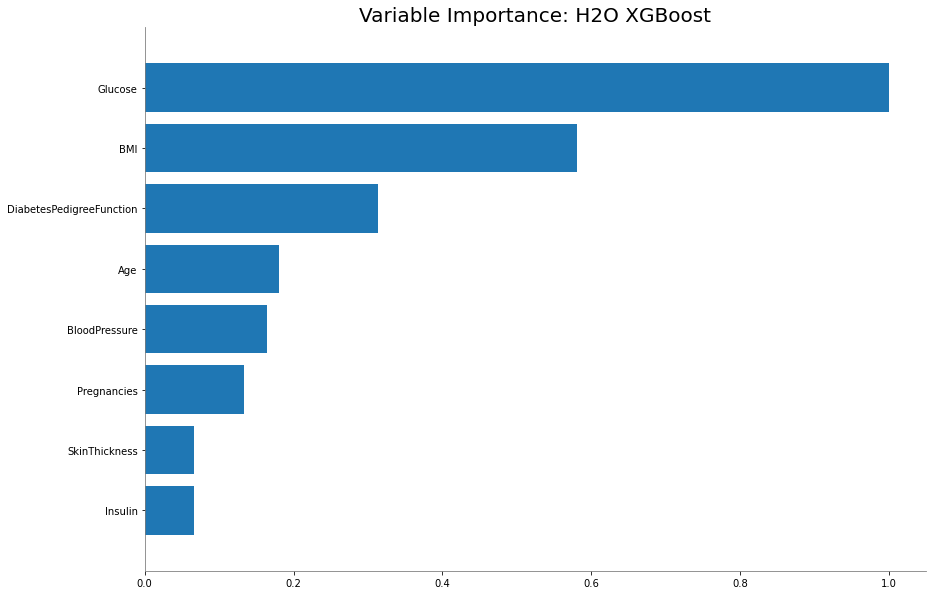

In [ ]:
cv_xgb.varimp_plot()

In [ ]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |
20:40:45.932: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [ ]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20210321_204045,0.837823,0.470527,0.735514,0.224846,0.389179,0.15146
DRF_1_AutoML_20210321_204045,0.837591,0.67357,0.75014,0.225158,0.390648,0.152606
StackedEnsemble_AllModels_AutoML_20210321_204045,0.832675,0.4777,0.737934,0.23355,0.393266,0.154658
GLM_1_AutoML_20210321_204045,0.831638,0.488798,0.716653,0.238204,0.395915,0.156749
GBM_2_AutoML_20210321_204045,0.823921,0.492342,0.730483,0.240198,0.397899,0.158323
GBM_1_AutoML_20210321_204045,0.823186,0.499362,0.730256,0.23354,0.398824,0.15906
GBM_3_AutoML_20210321_204045,0.822944,0.491874,0.745621,0.245578,0.396877,0.157511
GBM_4_AutoML_20210321_204045,0.82235,0.492086,0.726875,0.241578,0.398974,0.159181
XGBoost_2_AutoML_20210321_204045,0.822047,0.491178,0.703901,0.242223,0.401098,0.160879
XGBoost_1_AutoML_20210321_204045,0.818512,0.508759,0.689964,0.24456,0.406372,0.165138


/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:821: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


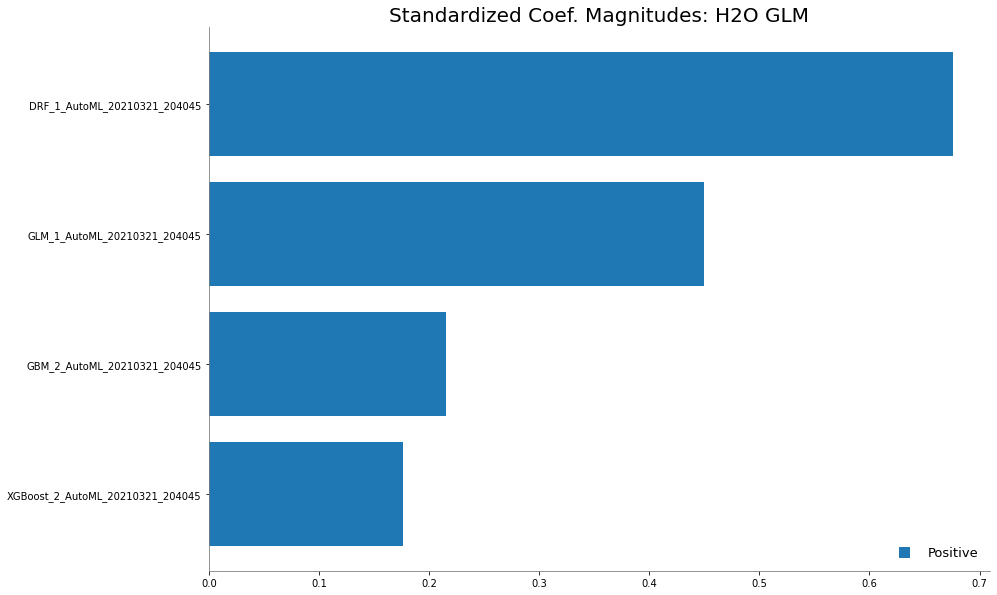

In [ ]:
metalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner.std_coef_plot()

In [ ]:
best_model = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])